In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import statsmodels.api as sm
pd.options.plotting.backend = "plotly"

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
sales = pd.read_pickle('../Data/sales_day_filtered.pkl')
sales.head()

,date,total_amount
0,2009-12-01,37366.32
1,2009-12-02,36596.16
2,2009-12-03,20965.15
3,2009-12-04,31448.44
4,2009-12-05,9042.36


In [5]:
fig = px.line(sales, x="date", 
                     y="total_amount", 
                     title='Total Sales Amount',
                     labels = {"total_amount": "Total Sales Amount($)",
                                "date": "Date"})
fig.show()

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

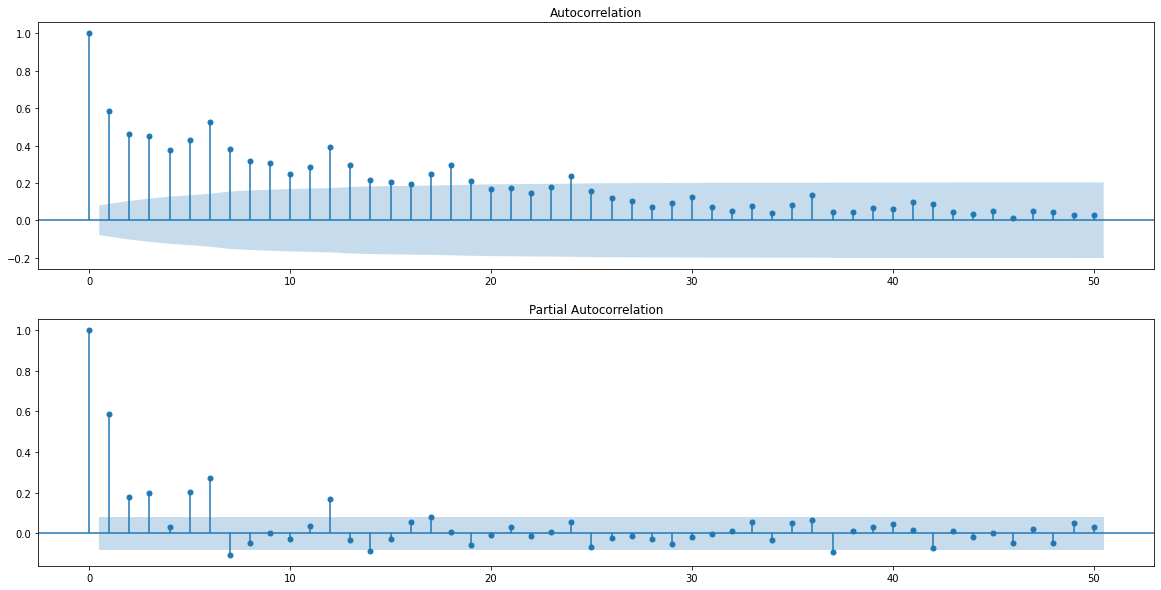

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plot_acf(sales['total_amount'], lags=50, ax = ax[0])
plot_pacf(sales['total_amount'], lags=50, ax = ax[1])
plt.show()

In [8]:
sales1_train = sales.iloc[:int(sales.shape[0]*0.6)]
sales1_val = sales.iloc[int(sales.shape[0]*0.6):int(sales.shape[0]*0.8)]
sales1_test = sales.iloc[int(sales.shape[0]*0.8):]
print('train: ', sales1_train.shape)
print('val: ', sales1_val.shape)
print('test: ', sales1_test.shape)

train:  (362, 2)
val:  (121, 2)
test:  (121, 2)


In [9]:
sales1_train['date'] = pd.to_datetime(sales1_train['date'])
sales1_train.index = sales1_train['date']
sales1_train = sales1_train.drop(columns = ['date'])

sales1_test['date'] = pd.to_datetime(sales1_test['date'])
sales1_test.index = sales1_test['date']

sales1_test = sales1_test.drop(columns = ['date'])

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_81720/2897933732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_81720/2897933732.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
model = sm.tsa.SARIMAX(sales1_train['total_amount'], order=(1,1,1))
results = model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03444D+01    |proj g|=  6.76536D-02

At iterate    5    f=  1.03328D+01    |proj g|=  3.43565D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   8.379D-06   1.033D+01
  F =   10.332813638739955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           total_amount   No. Observations:                  362
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3740.479
Date:                Fri, 03 Mar 2023   AIC                           7486.957
Time:                        15:08:58   BIC                           7498.624
Sample:                             0   HQIC                          7491.595
                                - 362                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2490      0.059      4.255      0.000       0.134       0.364
ma.L1         -0.8049      0.037    -21.674      0.000      -0.878      -0.732
sigma2      6.181e+07   1.23e-10   5.04e+17      0.000    6.18e+07    6.18e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               719.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.82e+33. Standard errors may be unstable.
"""

In [11]:
import itertools as it
ps = range(0, 2)
qs = range(3, 6)

p = 0
d = 1 
q = 4

Ps = range(0, 2)
Qs = range(0, 3)

P = 0
D = 1 
Q = 1
s = 7

parameters = it.product(ps, qs, Ps, Qs)
parameters_list = list(parameters)


In [12]:
from sklearn.metrics import mean_absolute_percentage_error
def gs_arima(series, parameters_list, d, D, s, opt_method='powell'):
    
    results = []
    model = []
    best_MAPE = float("inf")
    MAPE = 0
    for param in parameters_list:
        try:
            model = sm.tsa.statespace.SARIMAX(
                series, 
                order=(param[0], d, param[1]), 
                seasonal_order=(param[2], D, param[3], s)).fit(method=opt_method, disp=False)
            
            predictions= results.predict(start=sales1_train.shape[0], end=sales1_train.shape[0]+sales1_val.shape[0]-1)
            predictions = pd.DataFrame(predictions)
            predictions.reset_index(drop=True, inplace=True)
            predictions.index = sales1_val.index
            predictions['Actual'] = sales1_val['total_amount']
            predictions.rename(columns={'predicted_mean':'Val'}, inplace=True)
            MAPE = mean_absolute_percentage_error(sales1_test['total_amount'], predictions['Val'])
        except:
            pass

        if MAPE < best_MAPE:
            best_model = model
            best_MAPE = MAPE
            best_param = param
        results.append([param, MAPE])

    result_table = pd.DataFrame(results)

    return result_table, best_model


In [13]:
result_table, best_mod = gs_arima(sales1_train['total_amount'], parameters_list, d, D, s)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be 

In [14]:
residuals = pd.DataFrame(best_mod.resid)
residuals.plot()

In [15]:
best_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       total_amount   No. Observations:                  362
Model:             SARIMAX(0, 1, 3)x(0, 1, [], 7)   Log Likelihood               -3794.852
Date:                            Fri, 03 Mar 2023   AIC                           7597.704
Time:                                    15:10:07   BIC                           7613.181
Sample:                                         0   HQIC                          7603.862
                                            - 362                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5697      0.040    -14.309      0.000      -0.648      -0.492
ma.L2         -0.1173      0.054     -2.164      0.030      -0.224      -0.011
ma.L3          0.0635      0.046      1.379      0.168      -0.027       0.154
sigma2      1.198e+08   1.41e-10   8.52e+17      0.000     1.2e+08     1.2e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                81.90
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               2.01   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.61e+33. Standard errors may be unstable.
"""

In [21]:
predictions= best_mod.predict(start=sales1_train.shape[0]+sales1_val.shape[0], end=sales.shape[0]-1)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [22]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = sales1_test.index
predictions['Actual'] = sales1_test['total_amount']
predictions.rename(columns={'predicted_mean':'Pred'}, inplace=True)

In [23]:
fig = px.line(predictions, x=predictions.index, y=predictions.columns[0:2])
fig.show()

In [19]:
print("MAPE: ", mean_absolute_percentage_error(sales1_test['total_amount'], predictions['Pred']))

MAPE:  8.627714973063576
